# Results

This notebook generates the plots for the rest of my experiments (see config.yml for details). The data is obtained by running the modified [ANN-Benchmarks](https://github.com/binidxaba/ann-benchmarks).

The relevant csv files are:
- create.csv: The result of grepping the index build start/end tags and convert to unix timestamps
- results.csv: The file generated by the benchmark after executing the data_export.py script

In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

## Data directory

You can find the data files in the following directories in the repository. Un-comment the one that you want to explore.

In [3]:
directory = "csv_sift_128_euclidean_parallel_full_1702552253"
#directory = "csv_gist_960_parallel_full_1702552133"
#directory = "csv_glove_200_1702404986"

In [4]:
colors = ["#412e93", "#f9457a", "#da38ca"]
ef_construction = 200

## Build Time

I parsed the ann-benchmarks output looking for the Index Build start/end tags, then converted those to Unix timestamps.

In [5]:
build_time = pd.read_csv(directory + "/create.csv")
build_time = build_time.rename(columns={'extension': 'Extension'})
build_time['build_time'] = build_time["end"]-build_time["start"]
build_time

,Extension,m,start,end,build_time
0,Lantern,16,1702495107,1702496711,1604
1,Lantern,24,1702499326,1702501413,2087
2,Pgvector,16,1702504614,1702507353,2739
3,Pgvector,24,1702510138,1702514327,4189


In [6]:
pv = build_time.pivot(index="m", columns="Extension", values="build_time")

Text(0.5, 1.0, 'Build Time (ef_construction=200)')

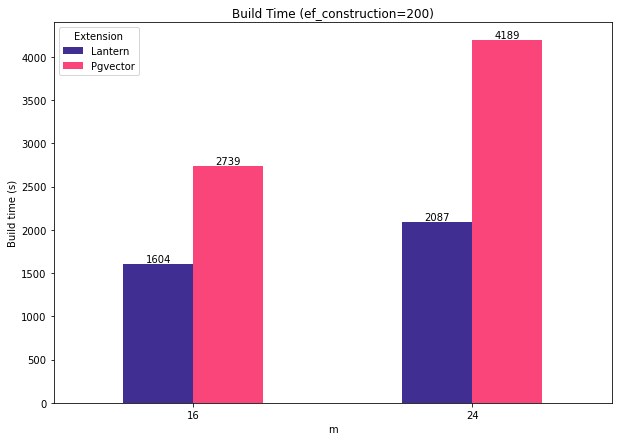

In [7]:
ax = pv.plot.bar(color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("Build time (s)")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_title(f"Build Time (ef_construction={ef_construction})")

In [8]:
pv

Extension,Lantern,Pgvector
m,,
16,1604,2739
24,2087,4189


In [9]:
pv["speed_up"] = 1 + (pv["Pgvector"] - pv["Lantern"]) / pv["Lantern"]
pv

Extension,Lantern,Pgvector,speed_up
m,,,
16,1604,2739,1.707606
24,2087,4189,2.007187


## Massaging the results.csv file

I basically had to parse the `parameters` column to extract the construction/search parameters. With that, I could easily pivot the data frame for the different plots.

In [10]:
df_all_results = pd.read_csv(directory + "/results.csv")
df_all_results = df_all_results.rename(columns={'algorithm': 'Extension'})
df_all_results

,Extension,parameters,count,k-nn,epsilon,largeepsilon,rel,qps,p50,p95,p99,p999,distcomps,build,candidates,indexsize,queriessize,dataset
0,lantern,"Lantern(m=16, ef_construction=200, ef_search=10)",10,0.70912,0.81256,0.99947,0.090719,618.534085,1.625807,1.625807,1.625807,1.625807,0.0,1816.766207,10.0,702840.0,1136.299546,sift-128-euclidean
1,lantern,"Lantern(m=24, ef_construction=200, ef_search=120)",10,0.99391,0.99962,1.00000,0.089368,112.088438,9.065796,9.065796,9.065796,9.065796,0.0,2301.992098,10.0,758056.0,6763.016876,sift-128-euclidean
2,lantern,"Lantern(m=16, ef_construction=200, ef_search=20)",10,0.83929,0.92794,1.00000,0.089954,463.860001,2.155823,2.155823,2.155823,2.155823,0.0,1816.766207,10.0,702840.0,1515.198548,sift-128-euclidean
3,lantern,"Lantern(m=24, ef_construction=200, ef_search=10)",10,0.75811,0.86179,0.99993,0.090371,506.116928,2.104370,2.104370,2.104370,2.104370,0.0,2301.992098,10.0,758056.0,1497.788273,sift-128-euclidean
4,lantern,"Lantern(m=24, ef_construction=200, ef_search=400)",10,0.99972,0.99998,1.00000,0.089355,42.778751,23.442207,23.442207,23.442207,23.442207,0.0,2301.992098,10.0,758056.0,17720.386349,sift-128-euclidean
5,lantern,"Lantern(m=24, ef_construction=200, ef_search=200)",10,0.99812,0.99991,1.00000,0.089358,75.056330,13.323327,13.323327,13.323327,13.323327,0.0,2301.992098,10.0,758056.0,10099.827660,sift-128-euclidean
6,lantern,"Lantern(m=16, ef_construction=200, ef_search=200)",10,0.99603,0.99978,1.00000,0.089363,100.176576,10.518712,10.518712,10.518712,10.518712,0.0,1816.766207,10.0,702840.0,7016.011441,sift-128-euclidean
7,lantern,"Lantern(m=16, ef_construction=200, ef_search=40)",10,0.92837,0.98105,1.00000,0.089573,318.414085,3.290677,3.290677,3.290677,3.290677,0.0,1816.766207,10.0,702840.0,2207.314413,sift-128-euclidean
8,lantern,"Lantern(m=24, ef_construction=200, ef_search=40)",10,0.95187,0.99049,1.00000,0.089490,252.299789,4.012577,4.012577,4.012577,4.012577,0.0,2301.992098,10.0,758056.0,3004.584361,sift-128-euclidean
9,lantern,"Lantern(m=16, ef_construction=200, ef_search=80)",10,0.97565,0.99709,1.00000,0.089418,205.487244,4.965330,4.965330,4.965330,4.965330,0.0,1816.766207,10.0,702840.0,3420.358290,sift-128-euclidean


In [11]:
c = re.compile(".*m=(\d+)")
df_all_results['m'] =  [int(c.match(x).group(1)) for x in df_all_results['parameters']]

c = re.compile(".*ef_search=(\d+)")
df_all_results['ef_search'] =  [int(c.match(x).group(1)) for x in df_all_results['parameters']]

c = re.compile(".*ef_construction=(\d+)")
df_all_results['ef_construction'] =  [int(c.match(x).group(1)) for x in df_all_results['parameters']]

df_all_results.head()

,Extension,parameters,count,k-nn,epsilon,largeepsilon,rel,qps,p50,p95,...,p999,distcomps,build,candidates,indexsize,queriessize,dataset,m,ef_search,ef_construction
0,lantern,"Lantern(m=16, ef_construction=200, ef_search=10)",10,0.70912,0.81256,0.99947,0.090719,618.534085,1.625807,1.625807,...,1.625807,0.0,1816.766207,10.0,702840.0,1136.299546,sift-128-euclidean,16,10,200
1,lantern,"Lantern(m=24, ef_construction=200, ef_search=120)",10,0.99391,0.99962,1.00000,0.089368,112.088438,9.065796,9.065796,...,9.065796,0.0,2301.992098,10.0,758056.0,6763.016876,sift-128-euclidean,24,120,200
2,lantern,"Lantern(m=16, ef_construction=200, ef_search=20)",10,0.83929,0.92794,1.00000,0.089954,463.860001,2.155823,2.155823,...,2.155823,0.0,1816.766207,10.0,702840.0,1515.198548,sift-128-euclidean,16,20,200
3,lantern,"Lantern(m=24, ef_construction=200, ef_search=10)",10,0.75811,0.86179,0.99993,0.090371,506.116928,2.104370,2.104370,...,2.104370,0.0,2301.992098,10.0,758056.0,1497.788273,sift-128-euclidean,24,10,200
4,lantern,"Lantern(m=24, ef_construction=200, ef_search=400)",10,0.99972,0.99998,1.00000,0.089355,42.778751,23.442207,23.442207,...,23.442207,0.0,2301.992098,10.0,758056.0,17720.386349,sift-128-euclidean,24,400,200


## Index Size

In [12]:
results_piv = df_all_results[df_all_results["ef_search"]==10].pivot(index="m", columns="Extension", values="indexsize")
results_piv = results_piv.rename(columns={'lantern': 'Lantern', 'pgvector':'Pgvector'})

results_piv

Extension,Lantern,Pgvector
m,,
16,702840.0,800888.0
24,758056.0,909920.0


Text(0.5, 1.0, 'Index Size (ef_construction=200)')

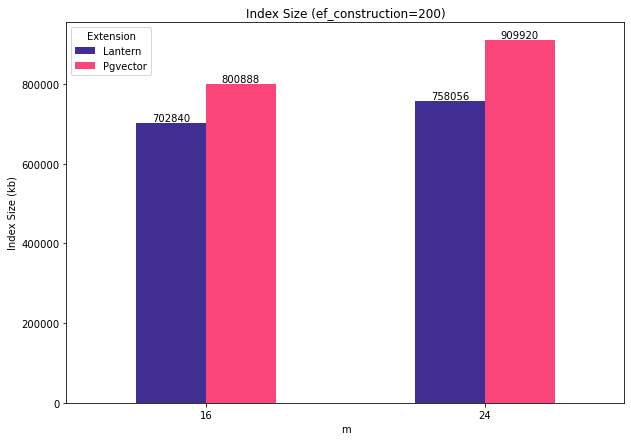

In [13]:
ax = results_piv.plot.bar(color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("Index Size (kb)")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_title(f"Index Size (ef_construction={ef_construction})")

In [14]:
results_piv["speed_up"] = (results_piv["Pgvector"] - results_piv["Lantern"])/results_piv["Lantern"]
results_piv

Extension,Lantern,Pgvector,speed_up
m,,,
16,702840.0,800888.0,0.139503
24,758056.0,909920.0,0.200333


In [15]:
df_all_results.head()

,Extension,parameters,count,k-nn,epsilon,largeepsilon,rel,qps,p50,p95,...,p999,distcomps,build,candidates,indexsize,queriessize,dataset,m,ef_search,ef_construction
0,lantern,"Lantern(m=16, ef_construction=200, ef_search=10)",10,0.70912,0.81256,0.99947,0.090719,618.534085,1.625807,1.625807,...,1.625807,0.0,1816.766207,10.0,702840.0,1136.299546,sift-128-euclidean,16,10,200
1,lantern,"Lantern(m=24, ef_construction=200, ef_search=120)",10,0.99391,0.99962,1.00000,0.089368,112.088438,9.065796,9.065796,...,9.065796,0.0,2301.992098,10.0,758056.0,6763.016876,sift-128-euclidean,24,120,200
2,lantern,"Lantern(m=16, ef_construction=200, ef_search=20)",10,0.83929,0.92794,1.00000,0.089954,463.860001,2.155823,2.155823,...,2.155823,0.0,1816.766207,10.0,702840.0,1515.198548,sift-128-euclidean,16,20,200
3,lantern,"Lantern(m=24, ef_construction=200, ef_search=10)",10,0.75811,0.86179,0.99993,0.090371,506.116928,2.104370,2.104370,...,2.104370,0.0,2301.992098,10.0,758056.0,1497.788273,sift-128-euclidean,24,10,200
4,lantern,"Lantern(m=24, ef_construction=200, ef_search=400)",10,0.99972,0.99998,1.00000,0.089355,42.778751,23.442207,23.442207,...,23.442207,0.0,2301.992098,10.0,758056.0,17720.386349,sift-128-euclidean,24,400,200


## Recall using m=16

In [16]:
m=16

In [17]:
results_piv = df_all_results[df_all_results["m"] == m].pivot(index="ef_search", columns="Extension", values="k-nn")
results_piv = results_piv.rename(columns={'lantern': 'Lantern', 'pgvector':'Pgvector'})
results_piv

Extension,Lantern,Pgvector
ef_search,,
10,0.70912,0.77341
20,0.83929,0.88189
40,0.92837,0.95232
80,0.97565,0.98563
120,0.98877,0.99360
200,0.99603,0.99806
400,0.99936,0.99972
800,NaN,0.99996


Text(0.5, 1.0, 'Recall (ef_construction=200, m=16)')

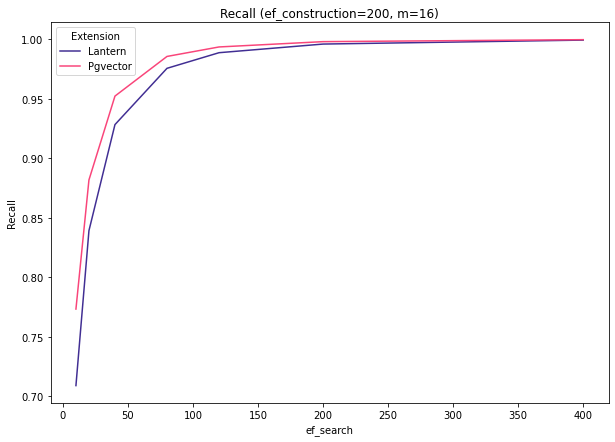

In [18]:
ax = results_piv[:-1].plot(color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("Recall")
ax.set_title(f"Recall (ef_construction={ef_construction}, m={m})")

## Throughput using m=16

In [19]:
results_piv = df_all_results[df_all_results["m"] == m].pivot(index="ef_search", columns="Extension", values="qps")
results_piv = results_piv.rename(columns={'lantern': 'Lantern', 'pgvector':'Pgvector'})
results_piv

Extension,Lantern,Pgvector
ef_search,,
10,618.534085,1000.639227
20,463.860001,751.854283
40,318.414085,501.620791
80,205.487244,287.082368
120,153.404003,212.444688
200,100.176576,140.561568
400,57.957273,82.499653
800,NaN,48.769996


Text(0.5, 1.0, 'QPS (ef_construction=200, m=16)')

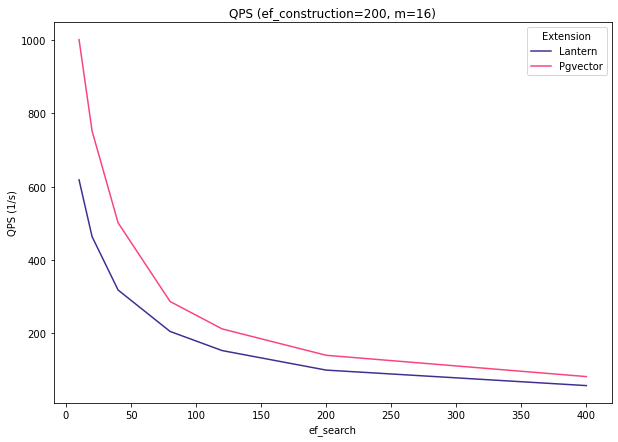

In [20]:
ax = results_piv[:-1].plot(color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("QPS (1/s)")
ax.set_title(f"QPS (ef_construction={ef_construction}, m={m})")

## Latency (95th Percentile) using m = 16

In [21]:
results_piv = df_all_results[df_all_results["m"] == m].pivot(index="ef_search", columns="Extension", values="p95")
results_piv = results_piv.rename(columns={'lantern': 'Lantern', 'pgvector':'Pgvector'})
results_piv

Extension,Lantern,Pgvector
ef_search,,
10,1.625807,0.999361
20,2.155823,1.362735
40,3.290677,1.999405
80,4.965330,3.488022
120,7.175159,4.842316
200,10.518712,7.184836
400,17.890837,12.121263
800,NaN,21.431176


Text(0.5, 1.0, 'Latency (95th percentile) (ef_construction=200, m=16)')

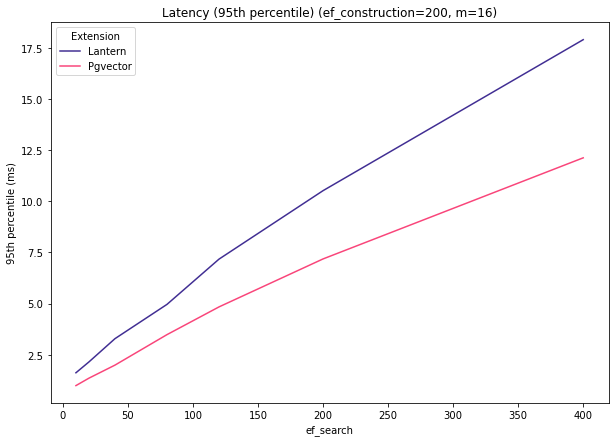

In [22]:
ax = results_piv[:-1].plot(color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("95th percentile (ms)")
ax.set_title(f"Latency (95th percentile) (ef_construction={ef_construction}, m={m})")

## Recall using m=24

In [23]:
m=24

In [24]:
results_piv = df_all_results[df_all_results["m"] == m].pivot(index="ef_search", columns="Extension", values="k-nn")
results_piv = results_piv.rename(columns={'lantern': 'Lantern', 'pgvector':'Pgvector'})
results_piv

Extension,Lantern,Pgvector
ef_search,,
10,0.75811,0.83177
20,0.87769,0.92026
40,0.95187,0.97166
80,0.98537,0.99241
120,0.99391,0.99680
200,0.99812,0.99918
400,0.99972,0.99992
800,NaN,1.00000


Text(0.5, 1.0, 'Recall (ef_construction=200, m=24)')

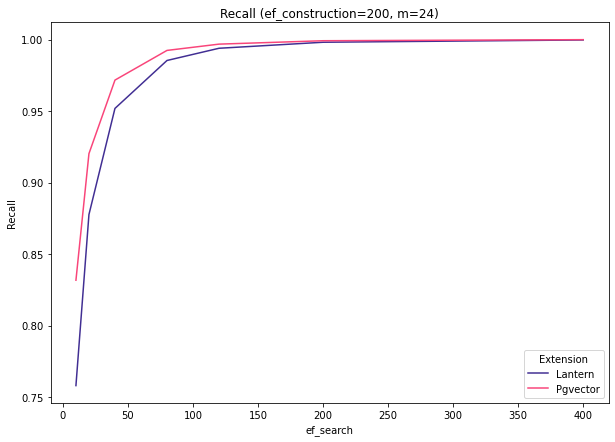

In [25]:
ax = results_piv[:-1].plot(color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("Recall")
ax.set_title(f"Recall (ef_construction={ef_construction}, m={m})")

## Throughput using m=24

In [26]:
results_piv = df_all_results[df_all_results["m"] == m].pivot(index="ef_search", columns="Extension", values="qps")
results_piv = results_piv.rename(columns={'lantern': 'Lantern', 'pgvector':'Pgvector'})
results_piv

Extension,Lantern,Pgvector
ef_search,,
10,506.116928,786.178816
20,363.786842,572.327840
40,252.299789,327.722094
80,155.058678,208.449034
120,112.088438,152.394561
200,75.056330,105.238483
400,42.778751,66.076065
800,NaN,34.660417


Text(0.5, 1.0, 'QPS (ef_construction=200, m=24)')

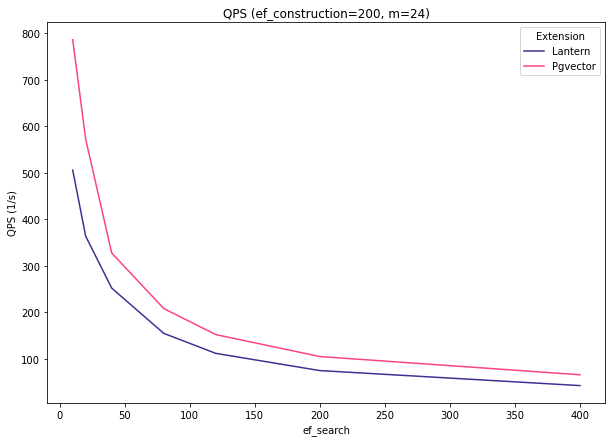

In [27]:
ax = results_piv[:-1].plot(color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("QPS (1/s)")
ax.set_title(f"QPS (ef_construction={ef_construction}, m={m})")

## Latency (95th Percentile) using m = 24

In [28]:
results_piv = df_all_results[df_all_results["m"] == m].pivot(index="ef_search", columns="Extension", values="p95")
results_piv = results_piv.rename(columns={'lantern': 'Lantern', 'pgvector':'Pgvector'})
results_piv

Extension,Lantern,Pgvector
ef_search,,
10,2.104370,1.285852
20,2.809980,1.883237
40,4.012577,3.088349
80,6.449171,4.817295
120,9.065796,6.561914
200,13.323327,9.502227
400,23.442207,15.938204
800,NaN,30.393088


Text(0.5, 1.0, 'Latency (95th percentile) (ef_construction=200, m=24)')

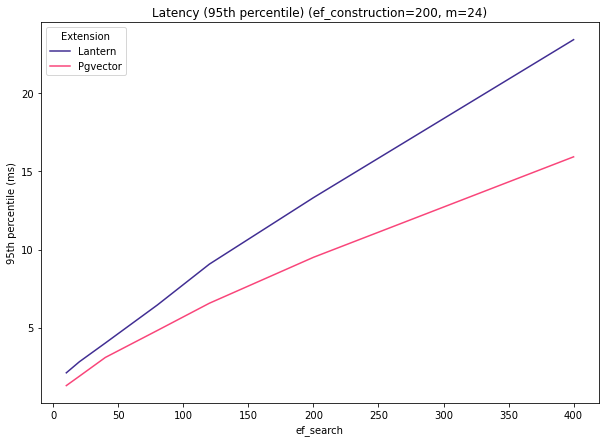

In [29]:
ax = results_piv[:-1].plot(color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("95th percentile (ms)")
ax.set_title(f"Latency (95th percentile) (ef_construction={ef_construction}, m={m})")